Customer churn is by far one of the most important metrics for a growing business to evaluate. While it's not the favorite measure, it's a number that can give your company the hard truth about its customer retention.Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. In this case, customrs who stopped using Teleco phone servce. This analytic covers the importance of customer churn in  Teleco service and reasons customers leave the service. Going forward this project, we help the analytic personals and managers create a more affordable service and retain customers. Our hypothesis is the Random Forest model will out perform the other models and get a higher accuracy. This data was collected from Kaggle. Telecom Customer Churn. The data contains 21 variables and 7,043 observers. We do have missing values to fill and drop columns not needed.


This dataset contains information about:

Customers who left  – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

For this project we will complete the following to get better prediction of customer Churn

1. Data exploration & visualization
2. Holdout (splitting data)

     - gridsearchCV
     - Decision tree model class
         + Cross validation
         + Confusion matrix
         + Classification_report
      - Random forest model class
         + Cross validation
         + Confusion matrix
         + Classification_report
      -KNN Class
	+ Cross validation
         + Confusion matrix
         + Classification_report
      -Logistic Classification
	+ Cross validation
         + Confusion matrix
         + Classification_report
      -Support Vector Machine
	+ Cross validation
         + Confusion matrix
         + Classification_report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom_df = pd.read_csv('telecomChurn.csv')

Summary of data

In [3]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_df.info()
telecom_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

(7043, 21)

Checking for Null data

In [5]:
telecom_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
telecom_df.duplicated().sum()

0

# 1) What are some factors that lead to customer churn?

Number of Churn

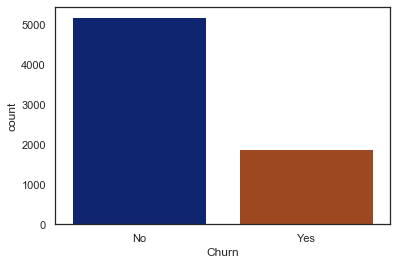

In [7]:
sns.set(style="white", palette="dark", color_codes=True)
sns.despine(left=True)
sns.countplot(telecom_df["Churn"]);

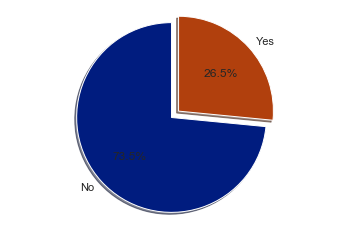

In [8]:
plt.pie(telecom_df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=telecom_df["Churn"].unique())
plt.axis('equal') ;

According to our pie chart 73.5% remain with teleco and 23.5% are churn.

Data Cleaning

In [9]:
telecom_df.query("TotalCharges == ' '").TotalCharges.count()

11

In [10]:
telecom_df["TotalCharges"] = telecom_df["TotalCharges"].replace(" ",np.nan)
telecom_df.dropna(inplace = True);

In [11]:
telecom_df["TotalCharges"] = telecom_df["TotalCharges"].astype("float")


Above we convert total charges to to float

In [12]:
telecom_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [13]:
telecom_df[telecom_df["TotalCharges"]<0]["TotalCharges"].count()


0

In [14]:
temp_columns = [col for col in telecom_df.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]


In [15]:
temp_columns


['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
for col in temp_columns:
    print("{} : {}".format(col,telecom_df[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        telecom_df[col] = telecom_df[col].replace({'No internet service':'No'})

In [18]:
temp_tenure = np.array(telecom_df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


In [19]:
def tenure_to_group(telecom_df):
    if telecom_df["tenure"] <=12:
        return "0_1_year"
    elif (telecom_df["tenure"] > 12) & (telecom_df["tenure"] <= 24 ):
        return "1_2_year"
    elif (telecom_df["tenure"] > 24) & (telecom_df["tenure"] <= 36) :
        return "2_3_year"
    elif (telecom_df["tenure"] > 36) & (telecom_df["tenure"] <= 48) :
        return "3_4_year"
    elif telecom_df["tenure"] > 48 & (telecom_df["tenure"] <= 60):
        return "4_5_year"
    elif telecom_df["tenure"] > 60 & (telecom_df["tenure"] <= 72):
        return "5_6_year"
telecom_df["Tenure_Group"] = telecom_df.apply(lambda telecom_df:tenure_to_group(telecom_df),axis = 1)

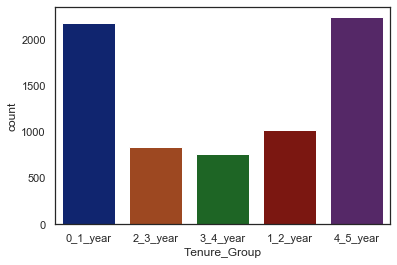

In [20]:
sns.countplot(telecom_df["Tenure_Group"]);

In the above chart we split the tenure groups, we have most of telco customers in the year 0-1 and 4- 5 years.

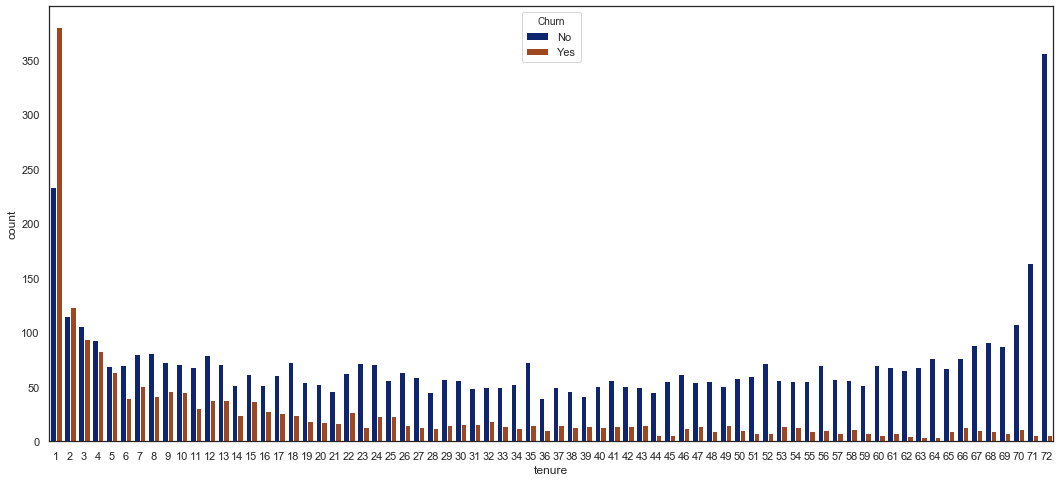

In [21]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(telecom_df["tenure"],hue = telecom_df["Churn"])

Our above graph is in relation to tenure and customers churn. We have our most churn customers fall with in the early years of service. with the most in between 1 and 2 months. On the contary telco retain most of customers after 72 months which is 6 years.

# 3) How are different services related to customer churn?

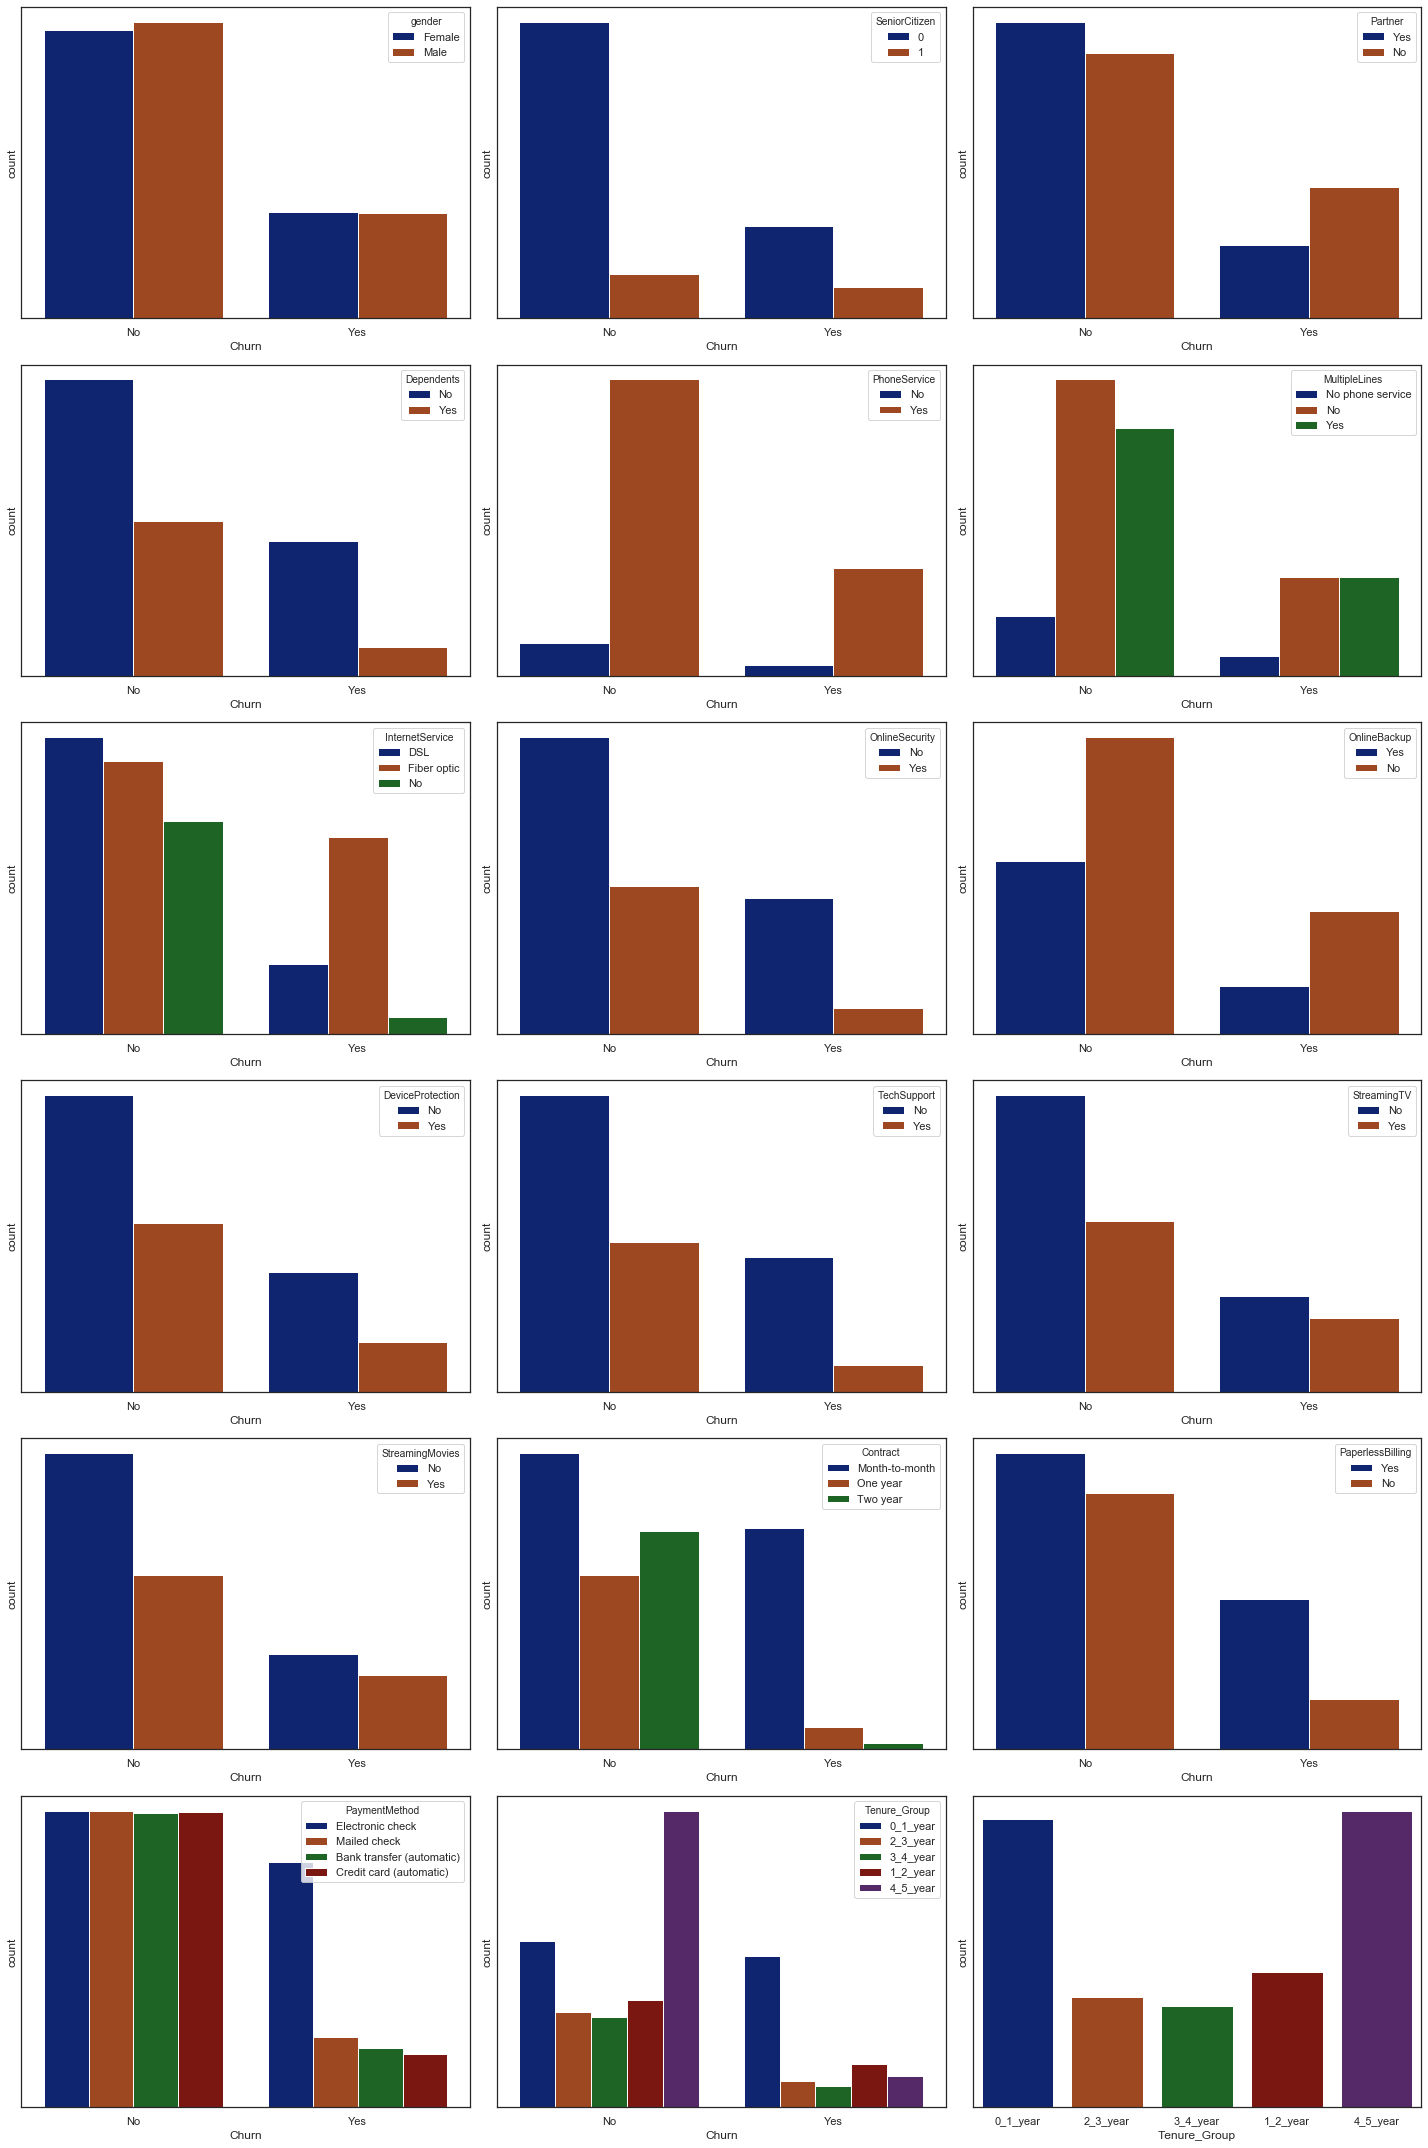

In [22]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(telecom_df["Churn"],hue = telecom_df["gender"],ax = axes[0,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(telecom_df["Churn"],hue = telecom_df["Partner"],ax = axes[0,2])
sns.countplot(telecom_df["Churn"],hue = telecom_df["Dependents"],ax = axes[1,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["PhoneService"],ax = axes[1,1])
sns.countplot(telecom_df["Churn"],hue = telecom_df["MultipleLines"],ax = axes[1,2])
sns.countplot(telecom_df["Churn"],hue = telecom_df["InternetService"],ax = axes[2,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["OnlineSecurity"],ax = axes[2,1])
sns.countplot(telecom_df["Churn"],hue = telecom_df["OnlineBackup"],ax = axes[2,2])
sns.countplot(telecom_df["Churn"],hue = telecom_df["DeviceProtection"],ax = axes[3,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["TechSupport"],ax = axes[3,1])
sns.countplot(telecom_df["Churn"],hue = telecom_df["StreamingTV"],ax = axes[3,2])
sns.countplot(telecom_df["Churn"],hue = telecom_df["StreamingMovies"],ax = axes[4,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["Contract"],ax = axes[4,1])
sns.countplot(telecom_df["Churn"],hue = telecom_df["PaperlessBilling"],ax = axes[4,2])
sns.countplot(telecom_df["Churn"],hue = telecom_df["PaymentMethod"],ax = axes[5,0])
sns.countplot(telecom_df["Churn"],hue = telecom_df["Tenure_Group"],ax = axes[5,1])
sns.countplot(telecom_df["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

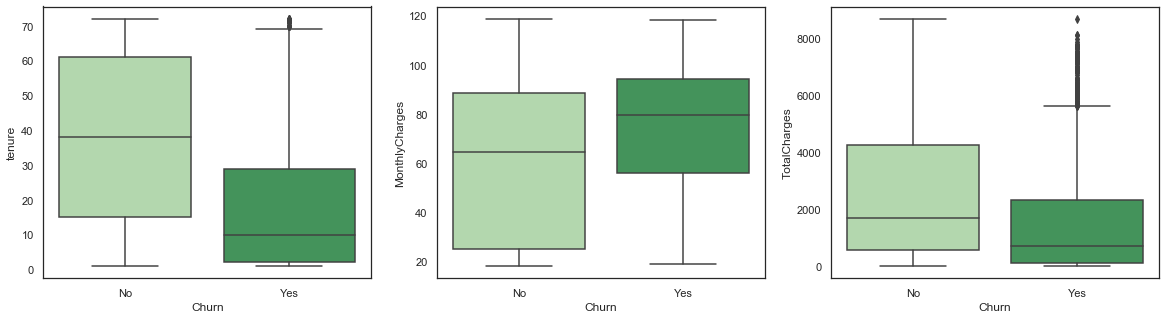

In [23]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=telecom_df,palette='Greens',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=telecom_df,palette='Greens',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=telecom_df,palette='Greens',ax = axes[2])

In our first box plot to the left we from years 18 and above customers tend to stay with teleco

The plot in the middle shows customers who are churn paid about $ 10 dollars more than those who are not churn.

The final graph to the far right shows the longer customers stayed with telecom paid much more than those who are churn

# 3 How do amount of years spent with Telecom releted to customers churn?

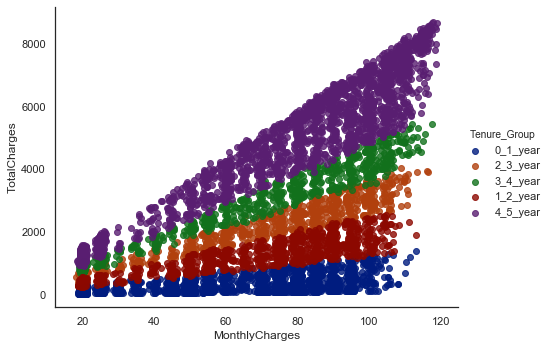

In [25]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=telecom_df,fit_reg = False,hue = "Tenure_Group",aspect=12/9);

Customers who maintain a longer relationship with telco paid more monthly and total charges. When we look at years 0-1, we see more outliers. This would make sense because the shorter the term the more customers pay.

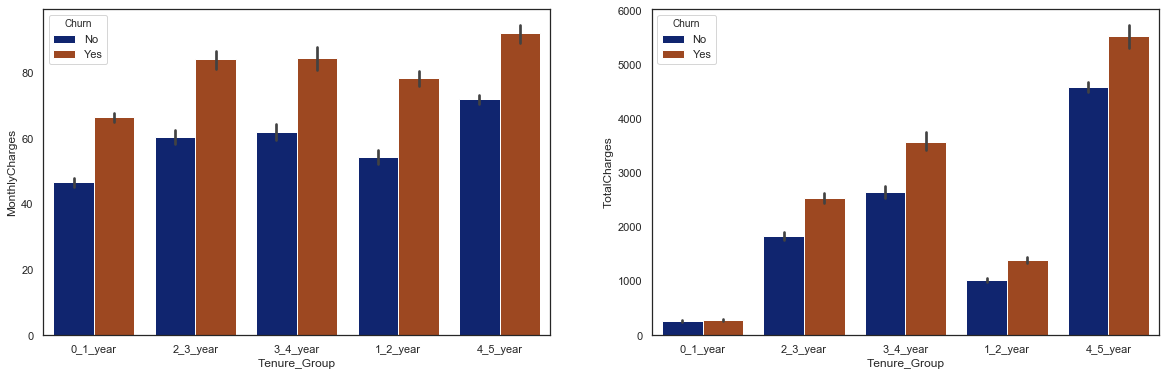

In [26]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=telecom_df,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=telecom_df,hue = "Churn",ax = axes[1])

The above graph displayed on the left is in relation to monthly charges, tenure and customer churn. We see that Those who are churn were paying about $20 dollars more than those who are are not churn. The longer the relationship with teleco, the more customers pay.

The graph to the right is in relation with total charges, customer churn, and tenure groups. Again the longer the relationship with telco, customers pay more total charges. We see the same relation where those who are not churn paid less than churn customers. The difference seems to be about $500 more churn customers were paying.

In [27]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Tenure_Group        7032 non-nul

Data Processing

In [28]:
cat_cols = [x for x in telecom_df.columns if telecom_df[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in telecom_df.columns if telecom_df[x].nunique()>6 and x!="customerID"]
id_customer = telecom_df["customerID"]
label = telecom_df["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [29]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = telecom_df[num_cols])
features_log_transformed[num_cols] = telecom_df[num_cols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

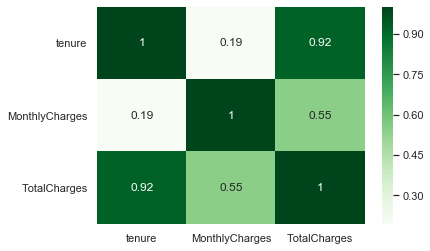

In [30]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='Greens');

In [37]:
from scipy import stats
import math

churn_yes = telecom_df[(telecom_df['Churn'] == 'Yes')]

churn_no = telecom_df[(telecom_df['Churn'] == 'No')]

In [34]:
# Our skewness and kurtosis is with in range, so we will move forward with stats ttest.
print(stats.describe(churn_no['MonthlyCharges']))
print(stats.describe(churn_yes['MonthlyCharges']))

DescribeResult(nobs=5163, minmax=(18.25, 118.75), mean=61.307408483439865, variance=966.8714692222991, skewness=-0.026790415107729938, kurtosis=-1.3550422715039776)
DescribeResult(nobs=1869, minmax=(18.85, 118.35), mean=74.44133226324237, variance=608.4141833954307, skewness=-0.7287883064780541, kurtosis=-0.36375819567133183)


In [35]:
# statistic is above 1.96 and the p-value is below .05 we will continue with Confidence Invterval 
stats.ttest_ind(churn_no['MonthlyCharges'], churn_yes['MonthlyCharges'])

Ttest_indResult(statistic=-16.47959313114872, pvalue=6.760843117980302e-60)

In [38]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(churn_no['MonthlyCharges'], churn_yes['MonthlyCharges'])

'The difference in means at the 95% confidence interval (two-tail) is between 11.730368652503815 and 14.537478907101471.'

[[Text(0, 0, 'churn_no'), Text(0, 0, 'churn_yes')]]

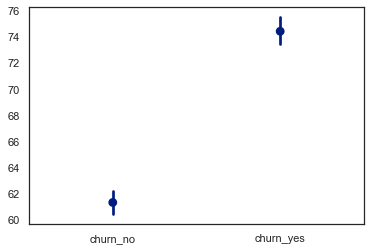

In [40]:
import seaborn as sns

g = sns.pointplot(data=[churn_no['MonthlyCharges'],
                        churn_yes['MonthlyCharges']], join=False)
                        
g.set(xticklabels = ['churn_no', 'churn_yes'])

Above is the monthly charges range on average compared to customer churn. On average churn customers spend $11.00 to $14.50 cents more than non churn customers.

In [41]:
telecom_df.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
telecom_df = pd.concat([telecom_df, features_log_minmax_transform], axis=1)

In [42]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Churn               7032 non-null object
Tenure_Group        7032 non-null object
tenure              7032 non-null float64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-nu

In [43]:
telecom_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure_Group        0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [44]:
# checking for duplicates
telecom_df.duplicated().sum()

0

In [45]:
telecom_df.drop("Churn",inplace = True, axis = 1)
telecom_df.drop("customerID",inplace = True, axis = 1)

In [46]:
# checking to make sure chur and customer ID were dropped
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Tenure_Group        7032 non-null object
tenure              7032 non-null float64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
dtypes: float64(3), int64(1), object(16)
memory usage: 1.4+ MB


In [47]:
telecom_df = pd.get_dummies(data = telecom_df,columns = cat_cols)

In [48]:
telecom_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.000000,0.258016,0.072892,1,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,0,0
1,0.795650,0.602917,0.749358,0,1,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0.112713,0.572840,0.280590,0,1,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0
3,0.871621,0.443484,0.745063,0,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.112713,0.719396,0.335724,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [49]:
original_telecom = pd.concat([telecom_df, label,id_customer], axis=1)

In [50]:
original_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
tenure                                     7032 non-null float64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
SeniorCitizen_0                            7032 non-null uint8
SeniorCitizen_1                            7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
MultipleLines_No                           7032 non-null uint8
Multi

In [51]:
original_telecom.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.000000,0.258016,0.072892,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.795650,0.602917,0.749358,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.112713,0.572840,0.280590,0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.871621,0.443484,0.745063,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.112713,0.719396,0.335724,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,9237-HQITU


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(telecom_df, label, test_size = 0.2, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5625 samples.
Testing set has 1407 samples.


In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standarizing the features

scaler = StandardScaler()
X_std = scaler.fit_transform(telecom_df)

In [54]:
# We just want the first two principal components
pca = PCA(n_components=2)

# calling fit_transform method with our data
pca_components = pca.fit_transform(telecom_df)

In [55]:
pca_components

array([[-0.7444841 , -0.38756947],
       [-0.54342401,  0.86405889],
       [-0.96290302, -0.2987113 ],
       ...,
       [-0.62812669,  0.41039336],
       [-0.8416258 , -0.92875569],
       [ 1.67905826, -0.14507925]])

In [56]:
from sklearn.decomposition import PCA
pca_telecom = PCA(n_components=2)
principalComponents_telecom = pca_telecom.fit_transform(X_std)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(y_test,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Area under ROC curve :  0.6951664587334538 



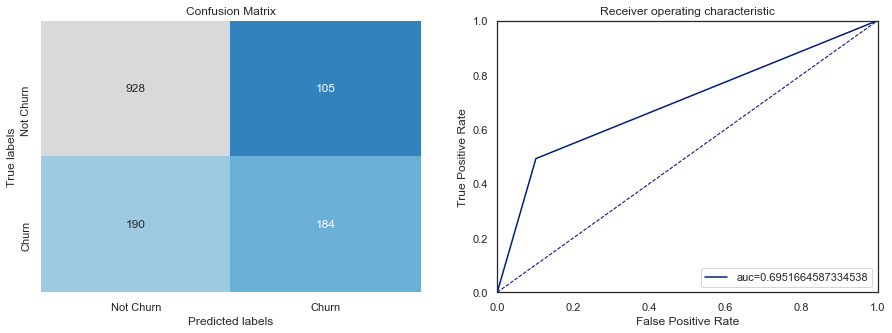

In [85]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

After the logistic regression model we check our underr ROC curve we received almost a 70%
and we have an F1- socre accuracy of 79%


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1033
           1       0.47      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.72      1407

Area under ROC curve :  0.655292461083703 



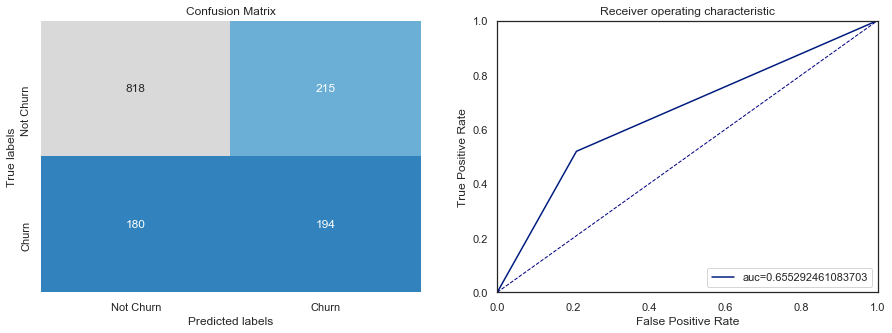

In [86]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)

In the decision tree model we see out angle is not cluse to the top left corner which is 1.0. Instead are about 66% with area under ROC curve. We got an f1-score accuracy at 72% worse than our logistic model above.


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.67      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407

Area under ROC curve :  0.6643479093652774 



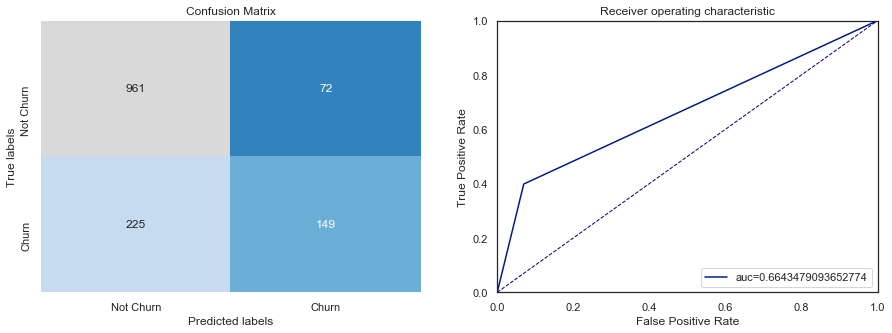

In [87]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)

SVM model scored 66% for ROC under the curve and 79% for f1-score


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Area under ROC curve :  0.6914094248101422 



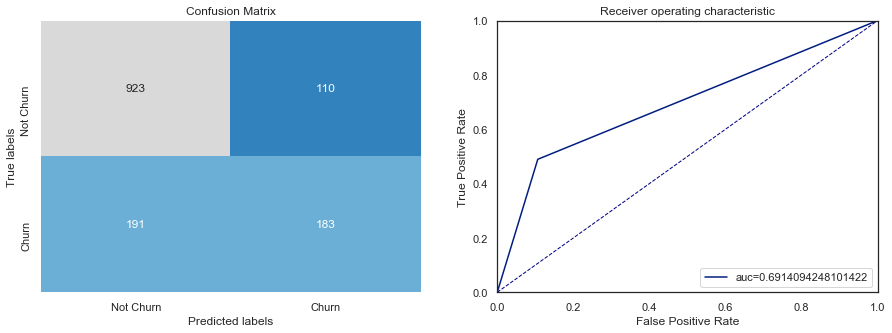

In [88]:
rand_forest_model = RandomForestClassifier(max_depth=8, random_state=0)
apply_classifier(rand_forest_model,X_train, X_test, y_train, y_test)

our random forest model received 69% for ROC under the curve and 79% for f1-score much better result.


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1033
           1       0.52      0.48      0.50       374

    accuracy                           0.75      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.75      0.74      1407

Area under ROC curve :  0.6604083946348054 



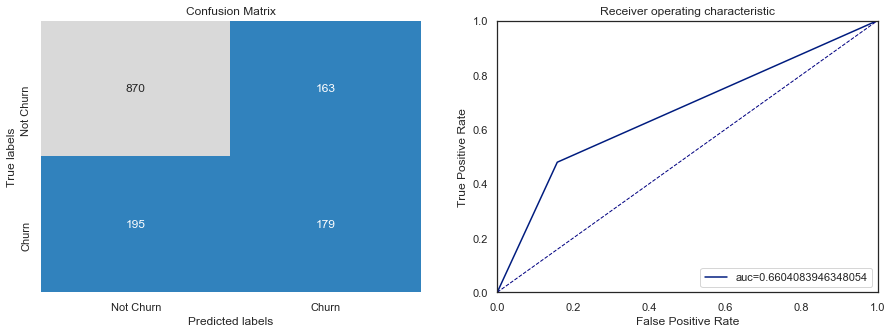

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
apply_classifier(knn_model,X_train, X_test, y_train, y_test)

Our KNeighbors model scored 66% for area under ROC curve and 75% for f1-score.

Overall we see that our logistic model scoed the best when we received 69.5% for ROC under the curve and 79% for f1-score.

# Tuning Parameters

In [90]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}
                     
KNeighbors_parameters = {
    "n_neighbors":[4,6,8,10],
    "weights": ["uniform", "distance"], 
    "algorithm": ["auto", "ball_tree","kd_tree"], 
    "leaf_size": [20,30,40,50], 
    "p": [1,2,3],
    "metric": ["euclidean"]
}

In [91]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,yTrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,yTrain)
    best_clf = grid_fit.best_estimator_

    return best_clf


 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407

Area under ROC curve :  0.7243957426321757 



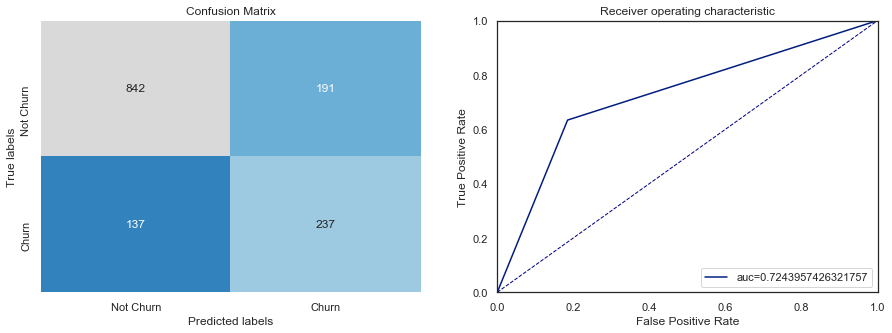

In [92]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train)
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

After tuning our decision tree model we see in increase in ROC curve by 6% and our f1-score increased by 5%


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Area under ROC curve :  0.6952816416542856 



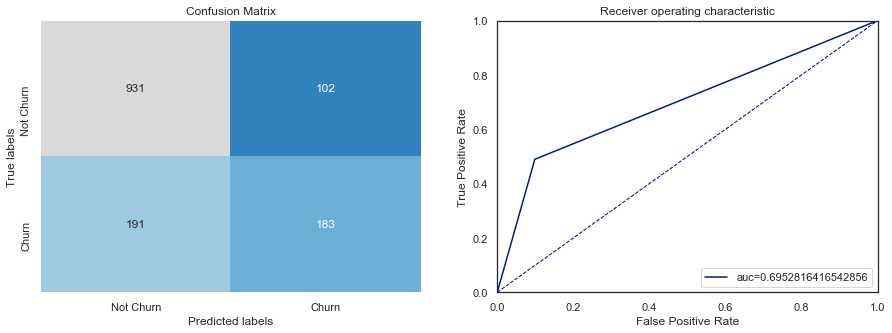

In [93]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train)
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)

Our logistic regression model did not receive much tuning it's about the same without tuning.


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Area under ROC curve :  0.6957656687598034 



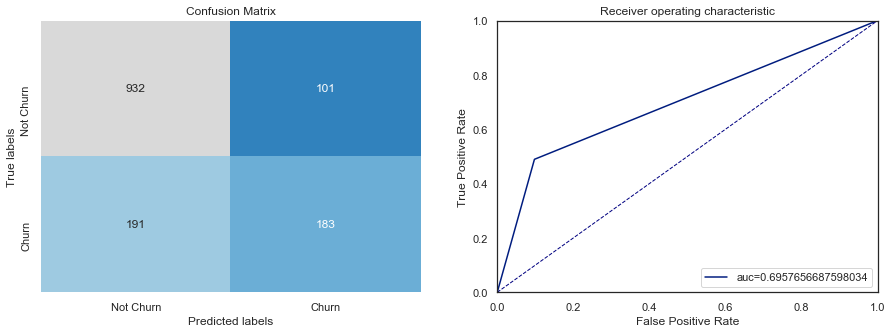

In [94]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train)
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)

Our svm tuning model increased it's ROC under the curve by 4% and our F1-score stayed the same at 79%


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.79      0.72      0.73      1407

Area under ROC curve :  0.7452127907398108 



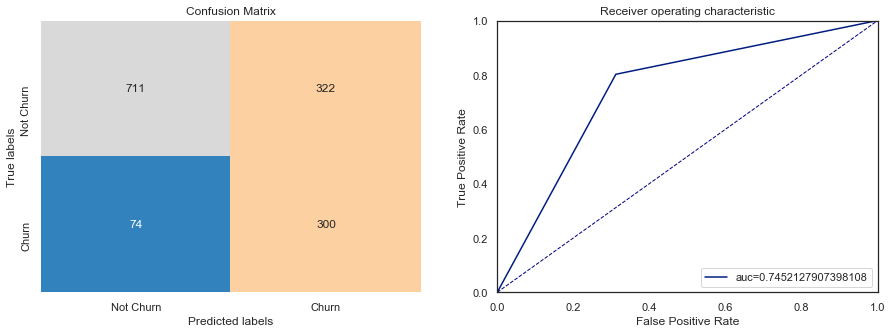

In [95]:
randomForest_grid = grid_search(rand_forest_model,RandomForest_parameters,X_train,y_train)
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

Random forest tuning model improved ROC under the curve bt 6% and f1-score went down by 7%


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      1033
           1       0.57      0.44      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407

Area under ROC curve :  0.6597160029196929 



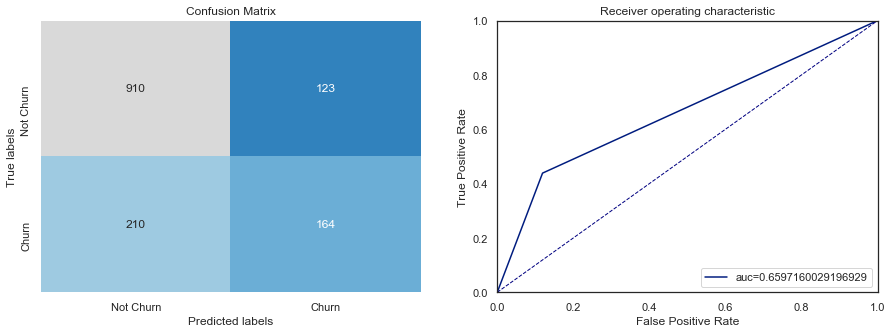

In [96]:
KNeighbors_grid = grid_search(knn_model,KNeighbors_parameters, X_train, y_train)
apply_classifier(KNeighbors_grid,X_train, X_test, y_train, y_test)

our KNN tuning model showed decrese in model. We got a 1% decrease in ROC curve and 1% decreased in f1-score.

# Models Summary

In conclusion of our models I would decide to choose the tuned Random forest model because of it's balance in area under the ROC curve and its f1-score. We got about 75% for Roc under the curve and 72% for f1-score. This is a good balance in score.

# Applying MLP to our models

In [100]:
# Alright! We've done our prep, let's build the model.
# Decision Tree model
from sklearn import tree

dtree_model = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf=2)
dtree_model.fit(X_train, y_train)



# Import the model.
from sklearn.neural_network import MLPClassifier



# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
# Our Multi Level Perceptron scored about 96% this is amazing.
mlp.score(X_train, y_train)

0.9568

In [103]:
# we see cross validation for MLP average cross val score is 76%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.77155556, 0.75911111, 0.75555556, 0.76266667, 0.78311111])

In [106]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, y_train)


# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [107]:
# Our Multi Level Perceptron scored 95%
mlp.score(X_train, y_train)

0.9534222222222222

In [108]:
# we see cross validation MLP scores and our average is about 77%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.77422222, 0.76088889, 0.75911111, 0.77511111, 0.77155556])

In [109]:
# Fitting Kernel Knn model to the Training set
knn_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
knn_model.fit(X_train, y_train)

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
# Our Multi Level Perceptron scored about 96% this is amazing.
mlp.score(X_train, y_train)

0.9537777777777777

In [111]:
# we see cross validation MLP scores and average is about 77%
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=5)

array([0.77866667, 0.75466667, 0.75733333, 0.76977778, 0.77511111])

Our decision Tree scored the highest out of our MLP modles with a score of 96% 
Average cross val score for all models is about 77%